In [1]:
import stereo as st
import scanpy as sc
import anndata as ad
import pandas as pd
import utils
import numpy as np
import matplotlib.pyplot as plt
import Pathway_analysis
import os
import anndata as ad

/home/ygong/anaconda3/envs/st/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
merge = sc.read_h5ad("../Result/anndata/integrated_data/annotation_integrate.h5ad")

In [3]:
# set the gene expression
# Load the data into a DataFrame
df = merge.obs.copy()  # Update the path to where your data is stored

# Define the mapping rules for the new_level column
conditions = [
    df['sample_id'].isin(['D02175A4', 'D02175A6', 'B01809A3', 'B01809A4', 'B01806B5', 'B01806B6']),
    df['sample_id'].isin(['C02248B5', 'B02009F6', 'B02008D2', 'B01809C2']),
    df['sample_id'].isin(['A02092E1', 'B02008C6'])
]

# Corresponding values for each condition
values = ['Control', 'Moderate', 'Severe']

# Create the new_level column using numpy's select function
df['new_level'] = np.select(conditions, values, default='Unknown')

merge.obs = df

... storing 'new_level' as categorical


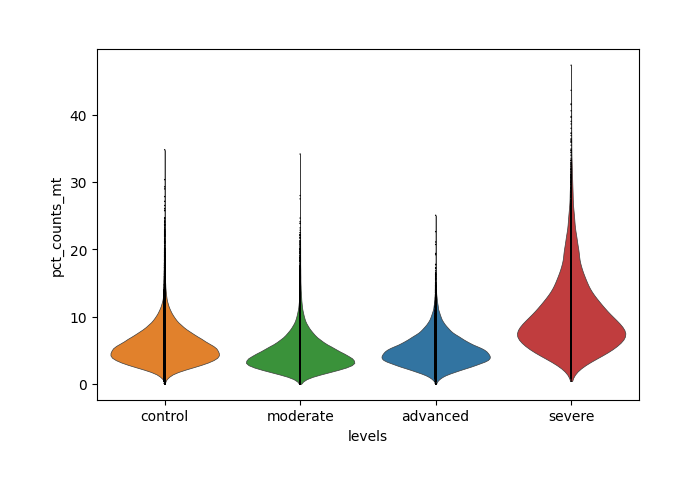

In [4]:
sc.pl.violin(merge, ['pct_counts_mt'],groupby="levels", order = ["control", "moderate", "advanced", "severe"], jitter=0)

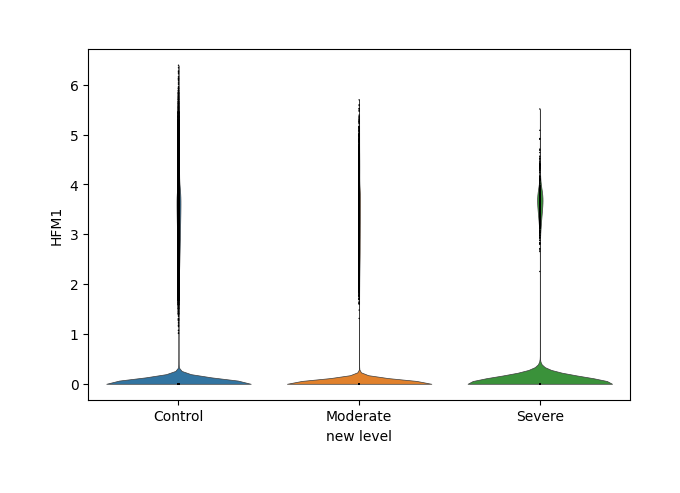

In [5]:
sc.pl.violin(merge, ["HFM1"], groupby="new_level", jitter=0)

In [4]:
# differential expression genes for each cell subtype
Ex = merge[merge.obs["annotation"] == "Ex"]

In [7]:
sc.tl.rank_genes_groups(Ex, 'new_level', groups=['Severe'], reference='Control', method='t-test')
table = utils.DE_table(Ex, gene_numbers=10)

In [9]:
table[table["Gene_name"] == "HFM1"]

,index,Group_key,Gene_name,Value,P_adjusted


In [39]:
# build the heat map
gene_list = []
for i in ["moderate", "advanced", "severe"]:
    print(i)
    sc.tl.rank_genes_groups(Ex, 'levels', groups=[i], reference='control', method='t-test')
    table = utils.DE_table(Ex, gene_numbers=10)
    gene_list += table["Gene_name"].tolist()
print(gene_list)

moderate
advanced
severe
['AC093525.2', 'RNF187', 'QDPR', 'RN7SK', 'NCDN', 'SLC38A2', 'ACOT7', 'PLP1', 'CTSD', 'TUBA1A', 'AAMDC', 'MTCO2P12', 'SLC38A2', 'RN7SK', 'QDPR', 'MALAT1', 'TUBAP2', 'NEFH', 'MTND4P12', 'EIF3C', 'MT-RNR2', 'MALAT1', 'MT-TV', 'MT-RNR1', 'MT-ND6', 'GFAP', 'MT-CO1', 'MT-TL1', 'NEAT1', 'AC090204.1']


/work/ygong/conda-envs/st/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


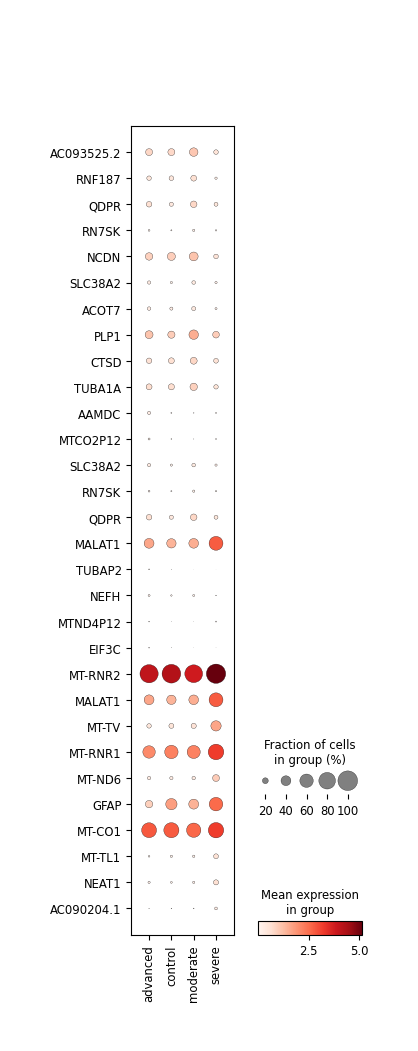

In [47]:
sc.pl.dotplot(merge, gene_list, groupby=["levels"], swap_axes = True)